    Visualising the data for college graduates using pandas

In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
# run the below to display the plot inline
%matplotlib inline 
import numpy as np

In [29]:
recent_grads = pd.read_csv('/Users/Suha/Projects/TestGitHub/Student_Graduates/college-majors/recent-grads.csv')

In [30]:
recent_grads.iloc[0]
recent_grads.head()
recent_grads.tail()
recent_grads.describe()



,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Let us look at the data and answer some of the questions - 

* Do students in more popular majors make more money? - Using scatter plots
* How many majors are predominantly male? Predominantly female? - Using histograms
* Which category of majors have the most students? - Using bar plots

Matplotlib will expect the column values to be of matching lenght. Missing values will cause matplotlib to throw errors


In [31]:
raw_data_count = recent_grads.shape[0]

In [32]:
recent_grads_clean = recent_grads.dropna(axis = 0)

In [33]:
clean_data_count = recent_grads_clean.shape[0]

In [34]:
print(raw_data_count, clean_data_count)
# Only one row had the missing value which was dropped

173 172


Generating scatter plots to explore relation between the following. For this we will use the method :DataFrame.plot()
* Sample_size and Median
* Sample_size and Unemployment_rate
* Full_time and Median
* ShareWomen and Unemployment_rate
* Men and Median
* Women and Median

we will develop a function for pearsons correlation to measure the strength of the correlation

In [35]:
def manual_pearson(a,b):

#     Accepts two arrays of equal length, and computes correlation coefficient. 
#     Numerator is the sum of product of (a - a_avg) and (b - b_avg), 
#     while denominator is the product of a_std and b_std multiplied by 
#     length of array. 

  a_avg, b_avg = np.average(a), np.average(b)
  a_stdev, b_stdev = np.std(a), np.std(b)
  n = len(a)
  denominator = a_stdev * b_stdev * n
  numerator = np.sum(np.multiply(a-a_avg, b-b_avg))
  p_coef = numerator/denominator
  return p_coef

print(manual_pearson(recent_grads_clean['Sample_size'], recent_grads_clean['Median']))
print(manual_pearson(recent_grads_clean['Sample_size'], recent_grads_clean['Unemployment_rate']))
print(manual_pearson(recent_grads_clean['Full_time'], recent_grads_clean['Median']))
print(manual_pearson(recent_grads_clean['ShareWomen'], recent_grads_clean['Unemployment_rate']))
print(manual_pearson(recent_grads_clean['Men'], recent_grads_clean['Median']))
print(manual_pearson(recent_grads_clean['Women'], recent_grads_clean['Median']))

-0.06447499542762183
0.06295493699511233
-0.07903093567520725
0.0732045786722932
0.025990597811967203
-0.18284186159966842


looks like there is some level of correlation between women and median salar. The rest of the scatter plots reflects very weak correlation

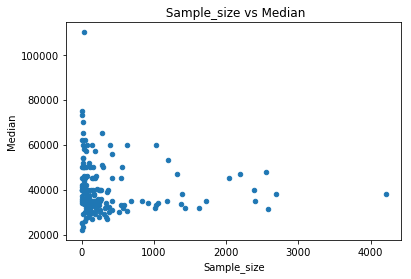

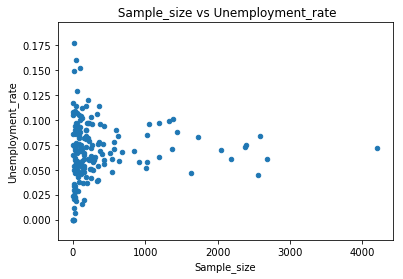

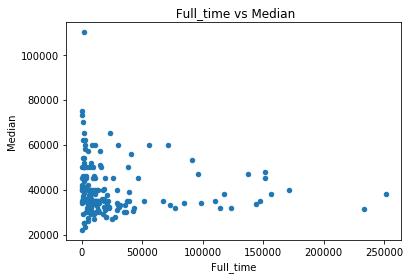

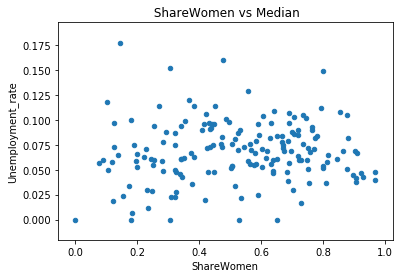

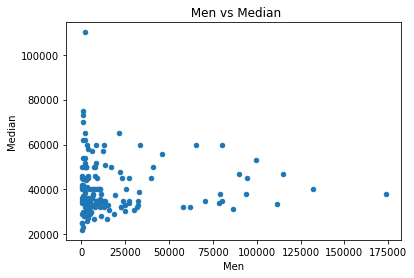

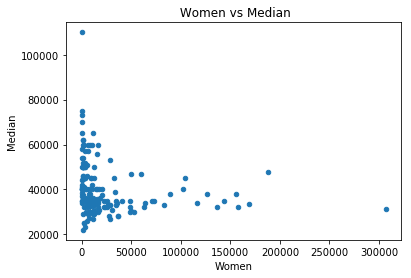

In [36]:
ax1 = recent_grads_clean.plot(x ='Sample_size' , y= 'Median', kind = 'scatter')
ax1.set_title(' Sample_size vs Median')


ax2 = recent_grads_clean.plot(x ='Sample_size' , y= 'Unemployment_rate', kind = 'scatter')
ax2.set_title(' Sample_size vs Unemployment_rate')

ax3 = recent_grads_clean.plot(x ='Full_time' , y= 'Median', kind = 'scatter')
ax3.set_title(' Full_time vs Median')

ax4 = recent_grads_clean.plot(x ='ShareWomen' , y= 'Unemployment_rate', kind = 'scatter')
ax4.set_title(' ShareWomen vs Median')

ax5 = recent_grads_clean.plot(x ='Men' , y= 'Median', kind = 'scatter')
ax5.set_title(' Men vs Median')

ax6 = recent_grads_clean.plot(x ='Women' , y= 'Median', kind = 'scatter')
ax6.set_title(' Women vs Median')

To explore the values in each column we will use Series.plot() method.


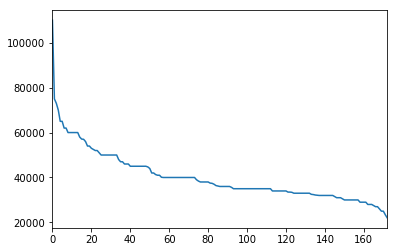

In [37]:
recent_grads_clean['Median'].plot()

To generate the histogram we will use Series.hist() method. Unlike Series.plot() this has a binning and range option

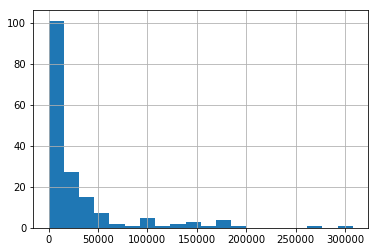

In [38]:
# recent_grads_clean['Median'].hist(bins = 20)
# recent_grads_clean['Sample_size'].hist(bins = 25, range = (0,5000))## controlling the xrange
recent_grads_clean['Employed'].hist(bins = 20)## controlling the xrange
# recent_grads_clean['Full_time'].hist(bins = 10, range = (0,5000))## controlling the xrange
# recent_grads_clean['ShareWomen'].hist(bins = 10, range = (0,5000))## controlling the xrange
# recent_grads_clean['Unemployment_rate'].hist(bins = 10, range = (0,5000))## controlling the xrange
# recent_grads_clean['Men'].hist(bins = 10, range = (0,5000))## controlling the xran
# recent_grads_clean['Women'].hist(bins = 10, range = (0,5000))## controlling the xran

In [39]:
# Plotting histogram in the same plot 
cols = ['Median', 'Sample_size', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

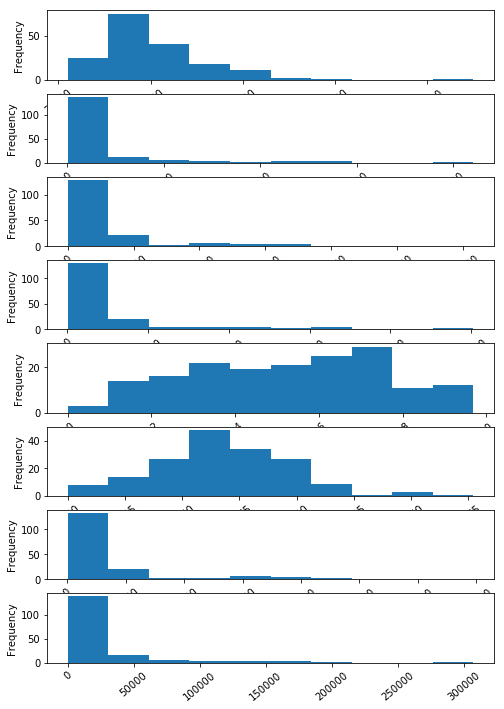

In [40]:
fig = plt.figure(figsize = (8,12))

for r in range (1,9):
    ax = fig.add_subplot(8,1,r)
    ax = recent_grads_clean[cols[r-1]].plot(kind = 'hist', rot = 40)
    

Some observations- 
Most common median salary range is around 40,000
Most of the men have a median income from 0 -25000and have about a higher pay of 175000
Most of the women have meian income from 0-25 same as men but also have very high pay as 300000

Let us use the scatter matrix function of pandas 

In [41]:
from pandas.plotting import scatter_matrix


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1453d49b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1457f2b38>]], dtype=object)

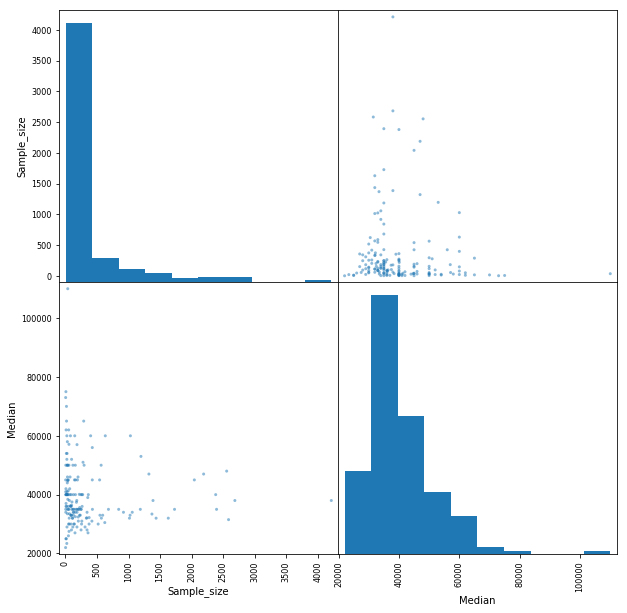

In [42]:
#Create a 2*2 scatter plot matrix
scatter_matrix(recent_grads_clean[['Sample_size', 'Median']], figsize = (10,10), grid = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1458d0d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x145e1b5f8>]], dtype=object)

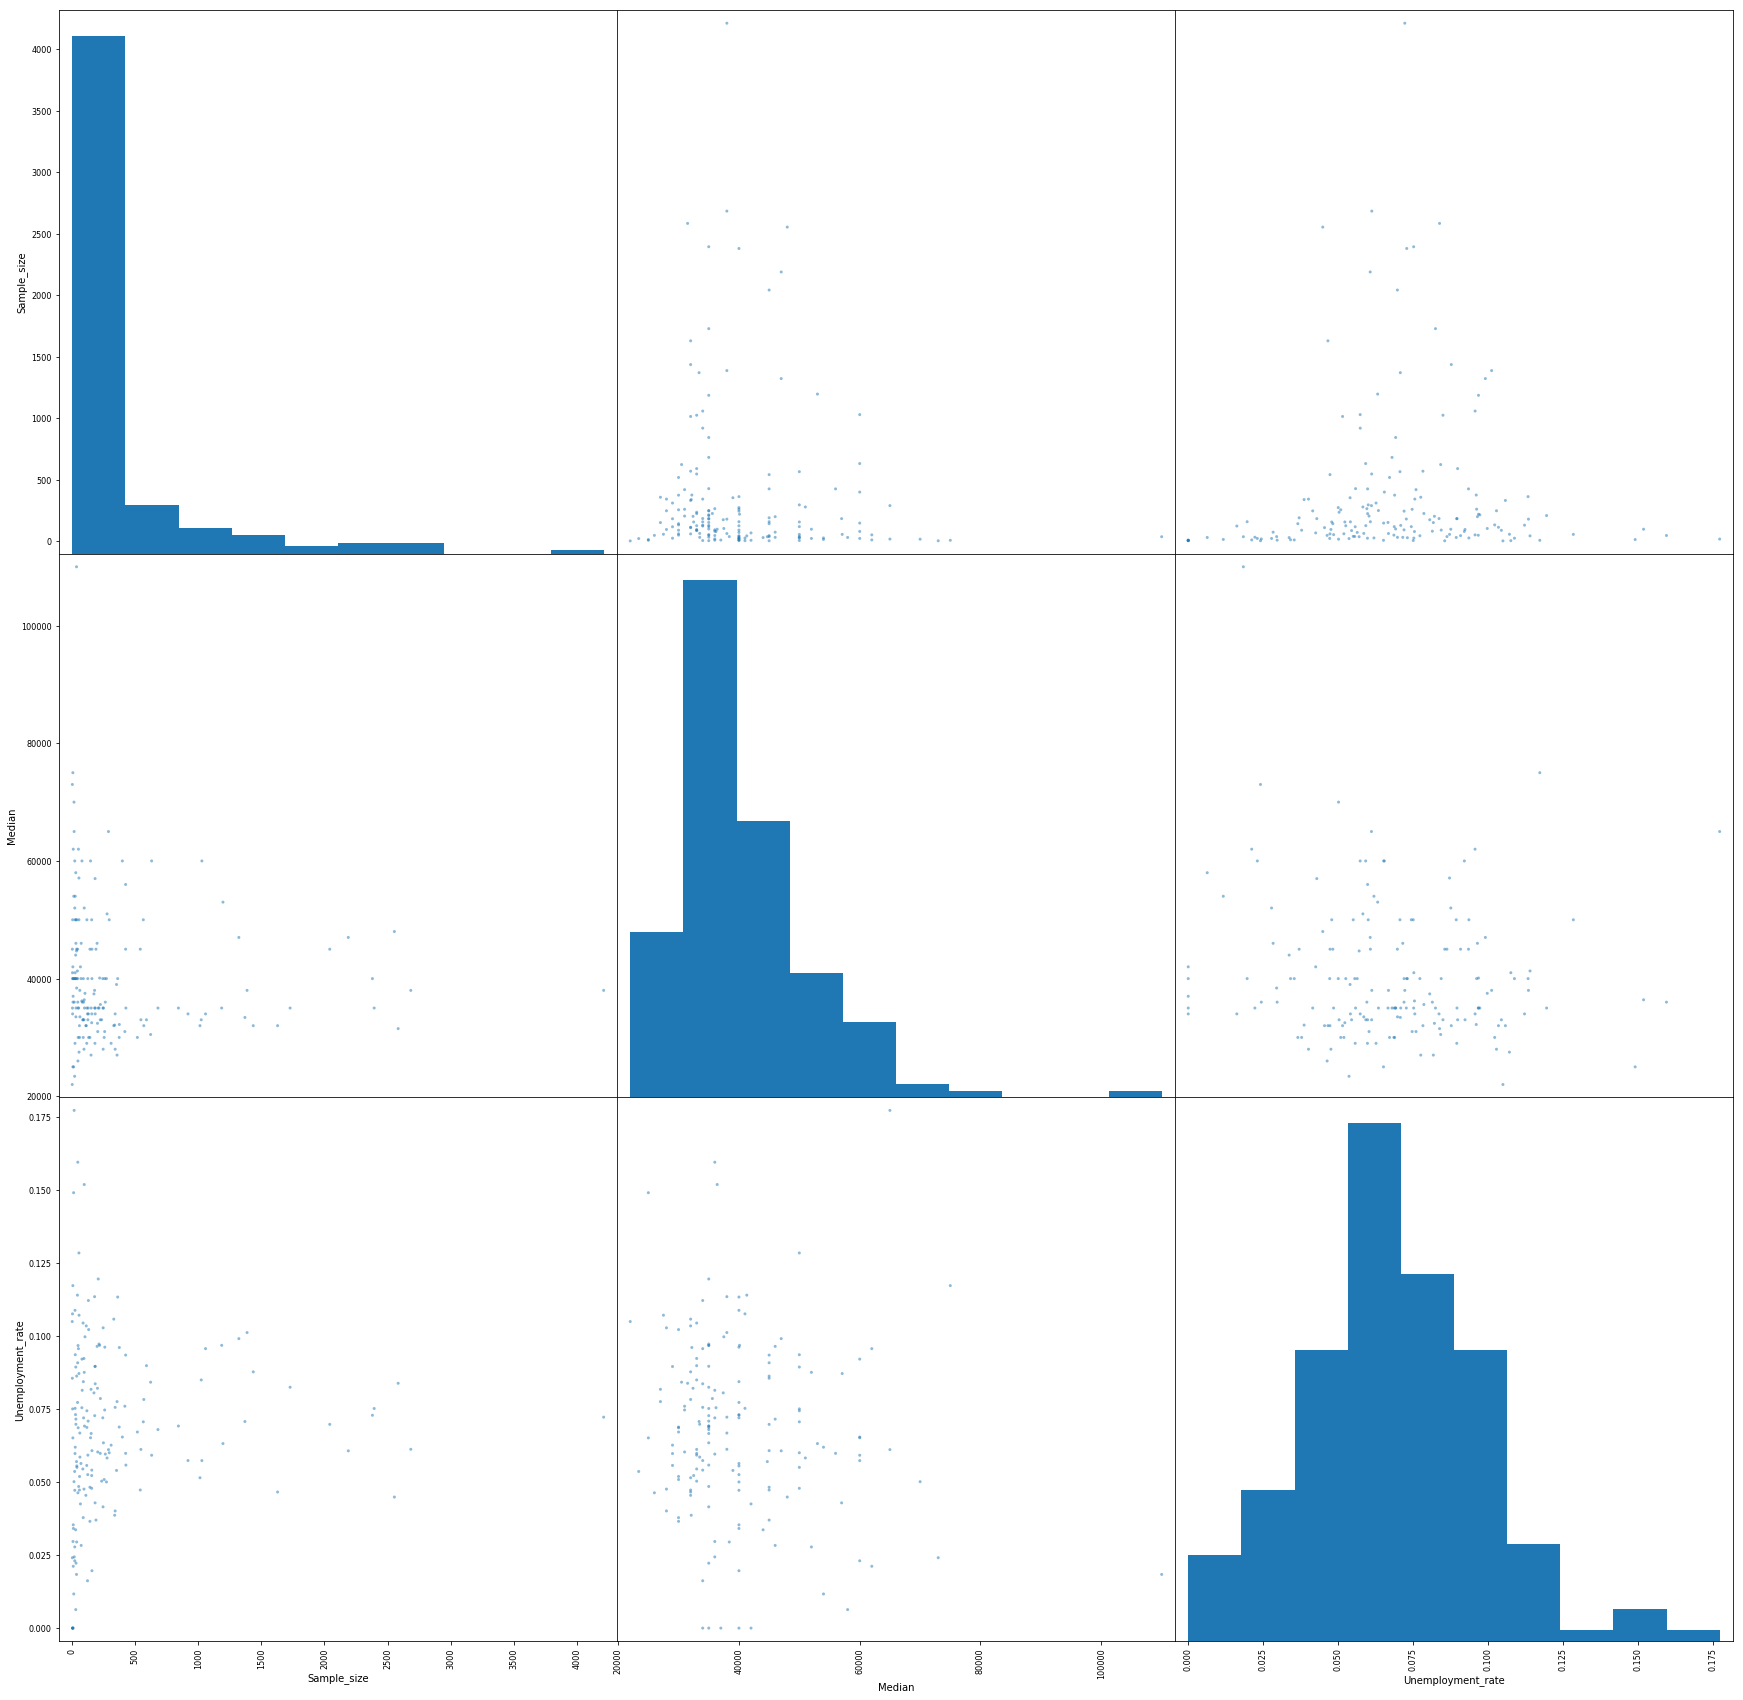

In [43]:
#Create a 3*3 scatter plot matrix
scatter_matrix(recent_grads_clean[['Sample_size', 'Median', 'Unemployment_rate']], figsize = (30, 30))

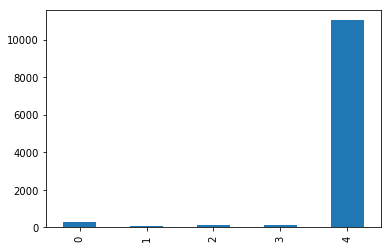

In [44]:
# looking at the first 5 values and last5 values
recent_grads_clean[:5]['Women'].plot(kind = 'bar')

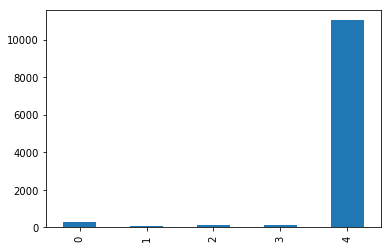

In [45]:
recent_grads_clean[:5]['Women'].plot.bar(x = 'Major', y = 'Women')

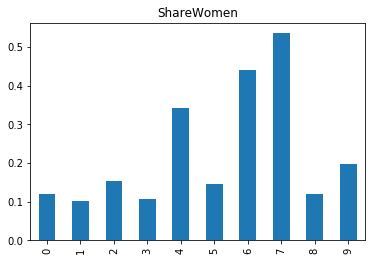

In [46]:
# Compare the percentage of the women from the first 10 row and the last 10 rows
ax = recent_grads_clean[:10]['ShareWomen'].plot.bar(x = 'Major', y = 'ShareWomen', subplots = True, legend = False)


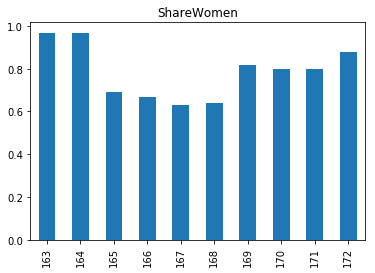

In [47]:
ax = recent_grads_clean[-10:]['ShareWomen'].plot.bar(x = 'Major', y = 'ShareWomen',subplots = True, legend = False)

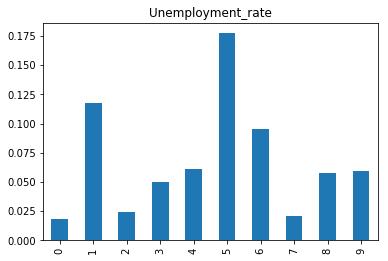

In [48]:
# Compare unemployement rate of the first 10 rows and last 10 rows of the dataframe
ax = recent_grads_clean[:10]['Unemployment_rate'].plot.bar(x = 'Major', y = 'Unemployment_rate', subplots = True, legend = False)

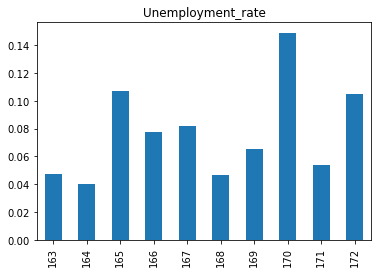

In [49]:
ax = recent_grads_clean[-10:]['Unemployment_rate'].plot.bar(x = 'Major', y = 'Unemployment_rate', subplots = True, legend = False)

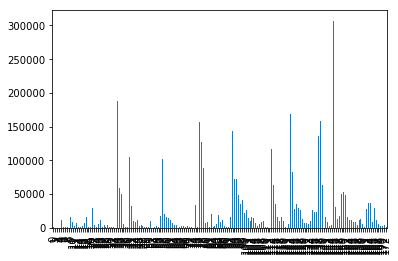

In [95]:
req_df = recent_grads_clean[["Men", "Women", "Major"]]
req_df.head()
req_df.head()


req_df["Major"].value_counts() # there are 172 majors

#grouping men and women based on the majors
working_df = req_df.groupby("Major").head() 
# plotting thr bar graph using this info

ax = working_df["Women"].plot.bar(x = "Major", y = "Women", legend = False)
